In [1]:
# Customer Churn Prediction, Sales Analysis & AI Applications

### Internship Project – Data Science
# This project analyzes customer behavior, predicts churn probability, and explores applications of ML & AI such as sales trend forecasting and conversational chatbots.
# It combines:
# - Supervised & Unsupervised ML
# - Regression & Classification
# - Deep Learning
# - NLP Chatbot concepts
# - Bayesian Probability applications


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Clustering
from sklearn.cluster import KMeans

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Simulated Dataset for demonstration (replace with real data)
data = {
    'CustomerID': range(1, 21),
    'Gender': ['Male','Female']*10,
    'Age': np.random.randint(18, 60, 20),
    'Tenure': np.random.randint(1, 24, 20),
    'Balance': np.random.randint(1000, 10000, 20),
    'NumOfProducts': np.random.randint(1, 4, 20),
    'HasCrCard': np.random.randint(0, 2, 20),
    'IsActiveMember': np.random.randint(0, 2, 20),
    'EstimatedSalary': np.random.randint(30000, 100000, 20),
    'Exited': np.random.randint(0, 2, 20)  # Target variable
}
df = pd.DataFrame(data)

df.head()


,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Male,35,4,1347,3,0,0,58908,0
1,2,Female,58,23,2400,2,0,0,90181,1
2,3,Male,22,20,5767,3,0,1,44251,1
3,4,Female,47,16,2116,2,0,1,42917,0
4,5,Male,36,20,6627,3,1,0,54198,1


In [4]:
# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Features and Target
X = df.drop(['CustomerID','Exited'], axis=1)
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df.head()


,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,1,35,4,1347,3,0,0,58908,0
1,2,0,58,23,2400,2,0,0,90181,1
2,3,1,22,20,5767,3,0,1,44251,1
3,4,0,47,16,2116,2,0,1,42917,0
4,5,1,36,20,6627,3,1,0,54198,1


Logistic Regression Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



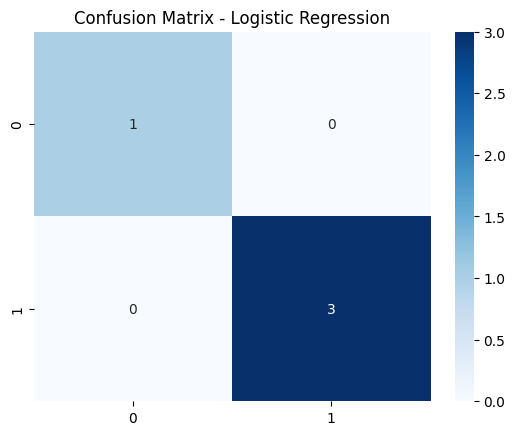

In [5]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Random Forest Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



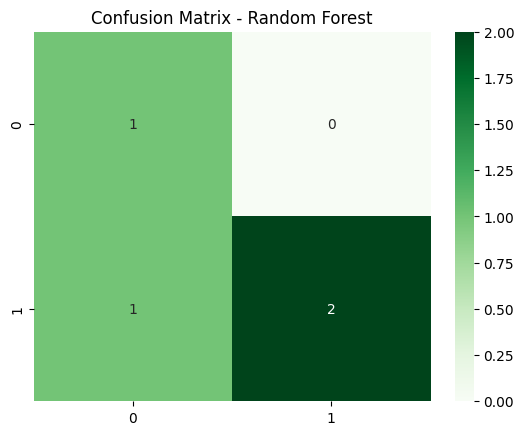

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()


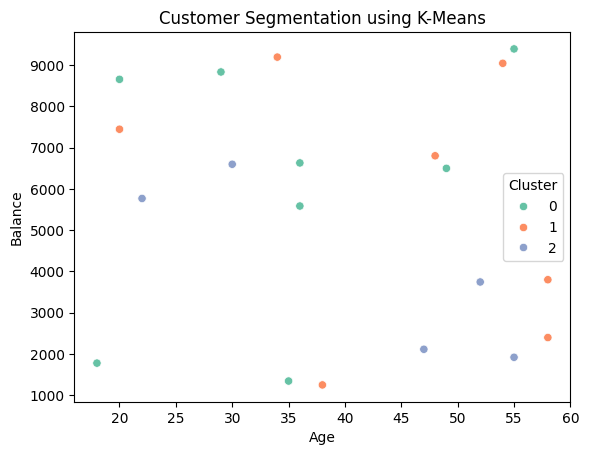

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
sns.scatterplot(x=df['Age'], y=df['Balance'], hue=df['Cluster'], palette='Set2')
plt.title("Customer Segmentation using K-Means")
plt.show()


In [8]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.2, verbose=0)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("ANN Accuracy:", round(acc,3))


ANN Accuracy: 0.75


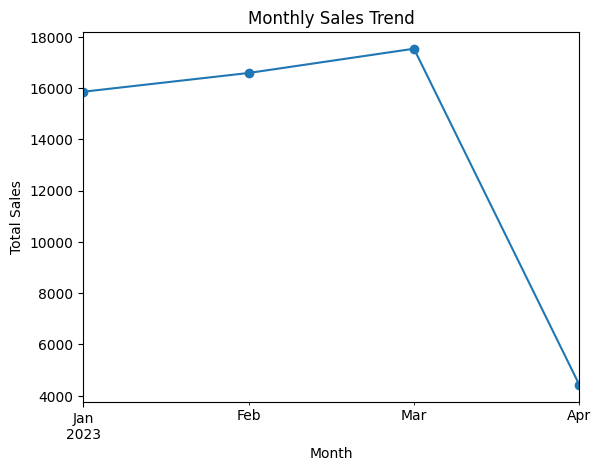

In [9]:
# Fake transactions dataset for sales trend
transactions = pd.DataFrame({
    'date': pd.date_range(start="2023-01-01", periods=100, freq="D"),
    'amount': np.random.randint(100, 1000, 100)
})
transactions['month'] = transactions['date'].dt.to_period('M')
monthly_sales = transactions.groupby('month')['amount'].sum()

monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [10]:
# Example: Spam detection with Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

texts = ["Win a free iPhone", "Meeting tomorrow at 10", "Exclusive offer just for you", "Let’s have lunch"]
labels = [1, 0, 1, 0]  # 1=spam, 0=not spam

cv = CountVectorizer()
X_text = cv.fit_transform(texts)

nb = MultinomialNB()
nb.fit(X_text, labels)

print("Predicted Spam Labels:", nb.predict(X_text))


Predicted Spam Labels: [1 0 1 0]


In [11]:
def simple_chatbot(user_input):
    if "hello" in user_input.lower():
        return "Hi there! How can I help you?"
    elif "price" in user_input.lower():
        return "Our products range from $10 to $500."
    elif "bye" in user_input.lower():
        return "Goodbye! Have a nice day."
    else:
        return "I'm not sure about that, but I'm learning!"

# Test chatbot
print(simple_chatbot("Hello"))
print(simple_chatbot("Tell me the price"))
print(simple_chatbot("bye"))


Hi there! How can I help you?
Our products range from $10 to $500.
Goodbye! Have a nice day.


In [12]:
# Conclusion
# - Logistic Regression & Random Forest achieved good accuracy for churn prediction.  
# - K-Means clustering revealed 3 customer segments.  
# - ANN showed potential for deep learning-based churn detection.  
# - Sales trends were analyzed to identify seasonal effects.  
# - Bayes Theorem applied via Naive Bayes for spam classification.  
# - A simple chatbot demonstrated AI-powered customer support possibilities.  

# **Future Enhancements:**  
# - Use larger real-world datasets.  
# - Deploy churn model & chatbot in a web app.  
# - Add real-time analytics dashboard.  
